In [ ]:
#installing the transformers library
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 119.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 89.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.5 MB/s eta 0:00:00


In [ ]:
#importing the pretrained biobert tokenizer and the biobert model
from transformers import AutoTokenizer, TFAutoModel
biobert_tokenizer = AutoTokenizer.from_pretrained("cambridgeltl/BioRedditBERT-uncased")

biobert_model = TFAutoModel.from_pretrained("cambridgeltl/BioRedditBERT-uncased")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['embeddings.position_ids']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
#displaying biobert model summary
biobert_model.summary()

Model: "tf_bert_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  108310272 
                                                                 
Total params: 108310272 (413.17 MB)
Trainable params: 108310272 (413.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**DataSet Creation**

In [ ]:
#function to extract question,answer and tags from the json objects
def extract_answer_question_tags(json_data):
  questions=[]
  answers=[]
  tags=[]
  for i in json_data:
    questions.append(i['question'])
    answers.append(i['answer'])
    tags.append(i['tags'])
  return questions,answers,tags

In [ ]:
#loading medical data from the disk
import pandas as pd
all_data=pd.read_excel('cleaned_data.xlsx')

In [ ]:
#displaying the medical data.
all_data

,Unnamed: 0,answer,question,url,tags
0,0,adhd bipolar mood disorder bmd coexist mistake...,5 1/2-year-old son display adhd symptom 20 day...,http://answers.webmd.com/answers/1194205/my-5-...,['attention deficit hyperactivity disorder']
1,1,stimulant general tend decrease appetite certa...,son add mild autism successfully concerta 6 ye...,http://answers.webmd.com/answers/1194206/my-so...,"['autism', 'weight loss']"
2,2,stimulant medication increase depressive sympt...,son 13 depressed taking vyvanse last 3 year ne...,http://answers.webmd.com/answers/1198557/my-so...,[]
3,3,seventy percent teen diagnosed younger continu...,17-year-old stopped taking concerta 10 year af...,http://answers.webmd.com/answers/1195455/my-17...,['attention deficit hyperactivity disorder']
4,4,try claritin-d located behind pharmacy counter...,ive taking respa-ar allergy cant seem get refi...,http://answers.webmd.com/answers/1182576/i-ve-...,['allergy']
...,...,...,...,...,...
29747,29747,get confirmed venous doppler lower limb varico...,pain leg varicose vein,https://questiondoctors.com/question-pain-in-l...,[]
29748,29748,hi dear le chance pregnancy u bar finished las...,headache really tired time feeling nauseated c...,https://questiondoctors.com/question-headaches...,"[""don't know if its too early to take a pregna..."
29749,29749,im radiologist may mri misread performing mri ...,46 year old male stroke right side brainnow an...,https://questiondoctors.com/question-46-year-o...,['stroke on right side of brain']
29750,29750,could reaction oxycodone frequent minor side e...,46 year old male stroke right side brainnow an...,https://questiondoctors.com/question-46-year-o...,['stroke on right side of brain']


In [ ]:
import re
import numpy as np
#function to preprocess tags post loading from disk
def preprocess_tags(tags):
  tags=tags[1:-1]
  tags=tags.replace("\'",'')
  return np.array(tags.split(', '))

In [ ]:
#preprocessing the tags post loading from disk
all_data['tags']=all_data.tags.apply(lambda x: preprocess_tags(x))

In [ ]:
#displaying the data
all_data.head()

,Unnamed: 0,answer,question,url,tags
0,0,adhd bipolar mood disorder bmd coexist mistake...,5 1/2-year-old son display adhd symptom 20 day...,http://answers.webmd.com/answers/1194205/my-5-...,[attention deficit hyperactivity disorder]
1,1,stimulant general tend decrease appetite certa...,son add mild autism successfully concerta 6 ye...,http://answers.webmd.com/answers/1194206/my-so...,"[autism, weight loss]"
2,2,stimulant medication increase depressive sympt...,son 13 depressed taking vyvanse last 3 year ne...,http://answers.webmd.com/answers/1198557/my-so...,[]
3,3,seventy percent teen diagnosed younger continu...,17-year-old stopped taking concerta 10 year af...,http://answers.webmd.com/answers/1195455/my-17...,[attention deficit hyperactivity disorder]
4,4,try claritin-d located behind pharmacy counter...,ive taking respa-ar allergy cant seem get refi...,http://answers.webmd.com/answers/1182576/i-ve-...,[allergy]


In [ ]:
import re
#preprocessing questions and answers.
def decontractions(phrase):
    """decontracted takes text and convert contractions into natural form.
     ref: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490"""
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)

    return phrase


def preprocess(text):
    # convert all the text into lower letters
    # remove the words betweent brakets ()
    # remove these characters: {'$', ')', '?', '"', '’', '.',  '°', '!', ';', '/', "'", '€', '%', ':', ',', '('}
    # replace these spl characters with space: '\u200b', '\xa0', '-', '/'
    text=str(text)
    text = text.lower()
    text = decontractions(text)
    text = re.sub('[$)\?"’.°!;\'€%:,(/]', '', text)
    text = re.sub('\u200b', ' ', text)
    text = re.sub('\xa0', ' ', text)
    text = re.sub('-', ' ', text)
    return text


all_data['preprocessed_question'] = all_data['question'].apply(preprocess)
all_data['preprocessed_answer'] = all_data['answer'].apply(preprocess)
all_data.head()

,Unnamed: 0,answer,question,url,tags,preprocessed_question,preprocessed_answer
0,0,adhd bipolar mood disorder bmd coexist mistake...,5 1/2-year-old son display adhd symptom 20 day...,http://answers.webmd.com/answers/1194205/my-5-...,[attention deficit hyperactivity disorder],5 12 year old son display adhd symptom 20 day ...,adhd bipolar mood disorder bmd coexist mistake...
1,1,stimulant general tend decrease appetite certa...,son add mild autism successfully concerta 6 ye...,http://answers.webmd.com/answers/1194206/my-so...,"[autism, weight loss]",son add mild autism successfully concerta 6 ye...,stimulant general tend decrease appetite certa...
2,2,stimulant medication increase depressive sympt...,son 13 depressed taking vyvanse last 3 year ne...,http://answers.webmd.com/answers/1198557/my-so...,[],son 13 depressed taking vyvanse last 3 year ne...,stimulant medication increase depressive sympt...
3,3,seventy percent teen diagnosed younger continu...,17-year-old stopped taking concerta 10 year af...,http://answers.webmd.com/answers/1195455/my-17...,[attention deficit hyperactivity disorder],17 year old stopped taking concerta 10 year af...,seventy percent teen diagnosed younger continu...
4,4,try claritin-d located behind pharmacy counter...,ive taking respa-ar allergy cant seem get refi...,http://answers.webmd.com/answers/1182576/i-ve-...,[allergy],ive taking respa ar allergy cant seem get refi...,try claritin d located behind pharmacy counter...


In [ ]:
#finding the lens of preprocessed questions and answers
all_data['question_len']=all_data['preprocessed_question'].apply(lambda x: len(x.split(' ')))
all_data['answer_len']=all_data['preprocessed_answer'].apply(lambda x: len(x.split(' ')))

In [ ]:
#printing different percentiles of question and answer lengths
import numpy as np
for i in range(0,101,10):
  print(i,np.percentile(all_data.question_len,i),np.percentile(all_data.answer_len,i))

0 1.0 1.0
10 4.0 11.0
20 5.0 16.0
30 6.0 21.0
40 8.0 26.0
50 9.0 32.0
60 12.0 40.0
70 19.0 52.0
80 31.0 71.0
90 47.0 108.0
100 187.0 700.0


In [ ]:
#printing different percentiles of question and answer lengths
for i in range(90,101,1):
  print(i,np.percentile(all_data.question_len,i),np.percentile(all_data.answer_len,i))

90 47.0 108.0
91 48.0 114.0
92 50.0 120.92000000000189
93 51.0 128.0
94 53.0 137.0
95 54.0 149.0
96 56.0 164.0
97 58.0 187.0
98 61.0 219.0
99 65.0 269.0
100 187.0 700.0


In [ ]:
#since more than 100% percent of questions and about 99% of all answers lie within 500 words, we use 500 as the max length
all_data['short_question']=all_data.apply(lambda x: ' '.join(x.preprocessed_question.split(' ')[:500]) if x.question_len>500 else x.preprocessed_question ,axis=1)
all_data['short_answer']=all_data.apply(lambda x: ' '.join(x.preprocessed_answer.split(' ')[:500]) if x.answer_len>500 else x.preprocessed_answer ,axis=1)

In [ ]:
#displaying the data post truncating the question and answers to length of 500
all_data.head(5)

,Unnamed: 0,answer,question,url,tags,preprocessed_question,preprocessed_answer,question_len,answer_len,short_question,short_answer
0,0,adhd bipolar mood disorder bmd coexist mistake...,5 1/2-year-old son display adhd symptom 20 day...,http://answers.webmd.com/answers/1194205/my-5-...,[attention deficit hyperactivity disorder],5 12 year old son display adhd symptom 20 day ...,adhd bipolar mood disorder bmd coexist mistake...,16,94,5 12 year old son display adhd symptom 20 day ...,adhd bipolar mood disorder bmd coexist mistake...
1,1,stimulant general tend decrease appetite certa...,son add mild autism successfully concerta 6 ye...,http://answers.webmd.com/answers/1194206/my-so...,"[autism, weight loss]",son add mild autism successfully concerta 6 ye...,stimulant general tend decrease appetite certa...,11,122,son add mild autism successfully concerta 6 ye...,stimulant general tend decrease appetite certa...
2,2,stimulant medication increase depressive sympt...,son 13 depressed taking vyvanse last 3 year ne...,http://answers.webmd.com/answers/1198557/my-so...,[],son 13 depressed taking vyvanse last 3 year ne...,stimulant medication increase depressive sympt...,11,114,son 13 depressed taking vyvanse last 3 year ne...,stimulant medication increase depressive sympt...
3,3,seventy percent teen diagnosed younger continu...,17-year-old stopped taking concerta 10 year af...,http://answers.webmd.com/answers/1195455/my-17...,[attention deficit hyperactivity disorder],17 year old stopped taking concerta 10 year af...,seventy percent teen diagnosed younger continu...,10,73,17 year old stopped taking concerta 10 year af...,seventy percent teen diagnosed younger continu...
4,4,try claritin-d located behind pharmacy counter...,ive taking respa-ar allergy cant seem get refi...,http://answers.webmd.com/answers/1182576/i-ve-...,[allergy],ive taking respa ar allergy cant seem get refi...,try claritin d located behind pharmacy counter...,12,13,ive taking respa ar allergy cant seem get refi...,try claritin d located behind pharmacy counter...


In [ ]:
#preparing the positive label dataset by taking the original question and original answer
all_dataset=all_data[['short_question','short_answer','tags']].copy()
all_dataset['label']=1.0

In [ ]:
#displaying the positive labelled dataset
all_dataset.head(3)

,short_question,short_answer,tags,label
0,5 12 year old son display adhd symptom 20 day ...,adhd bipolar mood disorder bmd coexist mistake...,[attention deficit hyperactivity disorder],1.0
1,son add mild autism successfully concerta 6 ye...,stimulant general tend decrease appetite certa...,"[autism, weight loss]",1.0
2,son 13 depressed taking vyvanse last 3 year ne...,stimulant medication increase depressive sympt...,[],1.0


In [ ]:
#function to extract the negative samples using tags
def extract_negative_samples(question,tags):
  stop=False
  while (not stop):
    sample_row= all_dataset.sample()
    sample_tags=sample_row.tags.values[0]
    inter_tags=set(tags[0]).intersection(set(sample_tags))
    if len(inter_tags)==0:
      stop=True
  return sample_row



In [ ]:
#preparing the negative labelled dataset
from tqdm.notebook import tqdm
tqdm.pandas()
negative_labels=all_dataset.progress_apply(lambda x: pd.Series([x.short_question,extract_negative_samples(x.short_question,x.tags).short_answer.values[0],x.tags]),axis=1)
negative_labels['label']=-1.0
negative_labels.columns=['short_question','short_answer','tags','label']

  0%|          | 0/29752 [00:00<?, ?it/s]

In [ ]:
#displaying the negative labelled dataset
negative_labels

,short_question,short_answer,tags,label
0,5 12 year old son display adhd symptom 20 day ...,unfortunately cancer esophagus detected late t...,[attention deficit hyperactivity disorder],-1.0
1,son add mild autism successfully concerta 6 ye...,mostly contact dermatitis due friction dryness...,"[autism, weight loss]",-1.0
2,son 13 depressed taking vyvanse last 3 year ne...,clear lumbar 5 sacral 1st disc protrusion comp...,[],-1.0
3,17 year old stopped taking concerta 10 year af...,bronchitis germ cause bronchitis one person ne...,[attention deficit hyperactivity disorder],-1.0
4,ive taking respa ar allergy cant seem get refi...,hi clearly side effect doxycycline cancer good...,[allergy],-1.0
...,...,...,...,...
29747,pain leg varicose vein,hi part plan get rid gall stone plan take week...,[],-1.0
29748,headache really tired time feeling nauseated c...,cause postpartum depression hormonal change ch...,"[""dont know if its too early to take a pregnan...",-1.0
29749,46 year old male stroke right side brainnow an...,uncommon feel every symptom seem present day t...,[stroke on right side of brain],-1.0
29750,46 year old male stroke right side brainnow an...,depends symptom nasal sinus congestion deconge...,[stroke on right side of brain],-1.0


In [ ]:
#concatenating the positive and negative labelled dataset to get the final labelled dataset.
all_data_with_labels=pd.concat([all_dataset,negative_labels],axis=0)
all_data_with_labels.shape

(59504, 4)

In [ ]:
#splitting the data into train and validation
from sklearn.model_selection import train_test_split
train, validation = train_test_split(all_data_with_labels, test_size=0.2,random_state=42,shuffle=True,stratify=all_data_with_labels.label)

In [ ]:
#saving train and validation data to disk
train.to_csv('train_data_chatbot.csv',index=False)
validation.to_csv('validation_data_chatbot.csv',index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Create directory if it doesn't exist
if not os.path.exists('/content/drive/My Drive/NLP'):
    os.makedirs('/content/drive/My Drive/NLP')

In [ ]:
# Assuming 'train' and 'validation' DataFrames are predefined
train.to_csv('/content/drive/My Drive/NLP/train_data_chatbot.csv', index=False)
validation.to_csv('/content/drive/My Drive/NLP/validation_data_chatbot.csv', index=False)

In [ ]:
#loading train and validation data from disk
import pandas as pd
train=pd.read_csv('/content/drive/My Drive/NLP/train_data_chatbot.csv')
validation=pd.read_csv('/content/drive/My Drive/NLP/validation_data_chatbot.csv')

# Define a function to check whether a value is a float
def is_not_float(value):
    return not isinstance(value, float)

# Filter the rows where 'short_answer' is not a float
train = train[train['short_answer'].apply(is_not_float)]
validation = validation[validation['short_answer'].apply(is_not_float)]

# Optional: Save the modified DataFrames back to CSV if desired
train.to_csv('/content/drive/My Drive/NLP/cleaned_train_data_chatbot.csv', index=False)
validation.to_csv('/content/drive/My Drive/NLP/cleaned_validation_data_chatbot.csv', index=False)

In [ ]:
# Optional: Save the modified DataFrames back to CSV if desired
import pandas as pd
train=pd.read_csv('/content/drive/My Drive/NLP/cleaned_train_data_chatbot.csv')
validation=pd.read_csv('/content/drive/My Drive/NLP/cleaned_validation_data_chatbot.csv')

In [ ]:
#displaying the train label counts
train.label.value_counts()

-1.0    23761
 1.0    23749
Name: label, dtype: int64

In [ ]:
#displaying the validation label counts
validation.label.value_counts()

-1.0    5943
 1.0    5940
Name: label, dtype: int64

In [ ]:
#displaying the train dataset
train.head(5)

,short_question,short_answer,tags,label
0,cause flesh like discharge period intercourse ...,hi think early miscarriage read found link mig...,['period' 'meat' 'pregnancy' 'birth control'],1.0
1,currently hippa eligible insured chip state il...,aca limit out of pocket cost associated plan s...,[''],1.0
2,doctor treat infertility,infertility treated medicine surgery artificia...,['infertility'],1.0
3,safely stop taking simvastatin 10 mg ever high...,much like asthma cause inflammation lining air...,['high blood pressure' 'artery' 'cholesterol' ...,-1.0
4,splitting pill save money safe,unfortunately youve missed open enrollment per...,[''],-1.0


In [ ]:
#extracting the short answers and questions from the train data
questions=train['short_question']
answers=train['short_answer']
labels=train['label']

In [ ]:
answers.head(100)

0     hi think early miscarriage read found link mig...
1     aca limit out of pocket cost associated plan s...
2     infertility treated medicine surgery artificia...
3     much like asthma cause inflammation lining air...
4     unfortunately youve missed open enrollment per...
                            ...                        
95           may want take another test also see doctor
96    helpful answer considered normal tell patient ...
97    21 year old acne mainly due hormonal change fa...
98    taking over the counter product read direction...
99    sorry split skin sea wash twice day till heals...
Name: short_answer, Length: 100, dtype: object

In [ ]:
# Extracting the 'short_answer' column
answers = train['short_answer']

# Finding rows where 'short_answer' contains the string 'average take' and has a length of 3
contains_string_and_has_length_3 = train[(answers.str.contains('average take', case=False, na=False)) &
                                         (answers.str.len() == 3)]

# Displaying those rows
print(contains_string_and_has_length_3)

Empty DataFrame
Columns: [short_question, short_answer, tags, label]
Index: []


In [ ]:
#https://blog.tensorflow.org/2019/05/transformer-chatbot-tutorial-with-tensorflow-2.html
#Setting Max_length to be 512 as discussed above
MAX_LENGTH = 512
import tensorflow as tf


# Tokenize, filter and pad sentences
def tokenize_and_filter(questions, answers):
  tokenized_questions, tokenized_answers = [], []

  for (question, answer) in zip(questions, answers):
    # generating sequences
    tokenized_question =  biobert_tokenizer.encode(question)
    tokenized_answer = biobert_tokenizer.encode(answer)
    tokenized_questions.append(tokenized_question)
    tokenized_answers.append(tokenized_answer)

  # padding the sequences
  tokenized_questions = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_questions, maxlen=MAX_LENGTH, padding='post')
  tokenized_answers = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_answers, maxlen=MAX_LENGTH, padding='post')

  return tokenized_questions, tokenized_answers

#tokenizing and padding the train questions and answers
questions, answers = tokenize_and_filter(questions, answers)

In [ ]:
#preparing the question mask and the answer mask of the train dataset
train_question_mask=[[1 if token!=0 else 0 for token in question] for question in questions]
train_answer_mask=[[1 if token!=0 else 0 for token in answer] for answer in answers]

In [ ]:
#extracting the short answers and questions from the validation data
# validation=pd.read_csv('/content/drive/My Drive/NLP/cleaned_validation_data_chatbot.csv')
val_questions=validation['short_question']
val_answers=validation['short_answer']
val_labels=validation['label']

In [ ]:
#tokenizing and padding the validation question and answers
val_questions, val_answers = tokenize_and_filter(val_questions, val_answers)

In [ ]:
#preparing the question and answer mask for the validation data
val_question_mask=[[1 if token!=0 else 0 for token in question] for question in val_questions]
val_answer_mask=[[1 if token!=0 else 0 for token in answer] for answer in val_answers]

In [ ]:
#https://blog.tensorflow.org/2019/05/transformer-chatbot-tutorial-with-tensorflow-2.html
#preparing the training  dataset
import tensorflow as tf
BATCH_SIZE = 2
BUFFER_SIZE = 20000
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'question': questions,
        'answer': answers,
        'question_mask':train_question_mask,
        'answer_mask':train_answer_mask
    },
    {
        'label': labels.values
    },
))

# dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE,drop_remainder=True)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
#https://blog.tensorflow.org/2019/05/transformer-chatbot-tutorial-with-tensorflow-2.html
#preparing the validation dataset
import tensorflow as tf
BATCH_SIZE = 2
BUFFER_SIZE = 20000
val_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'question': val_questions,
        'answer': val_answers,
        'question_mask':val_question_mask,
        'answer_mask':val_answer_mask
    },
    {
        'label': val_labels.values
    },
))

val_dataset = val_dataset.cache()
val_dataset = val_dataset.shuffle(BUFFER_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE,drop_remainder=True)
val_dataset = val_dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
#creating the ffn layer
#https://github.com/ash3n/DocProduct/blob/master/docproduct/models.py
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Concatenate,Conv1D,MaxPool1D,Dropout
class FFN(tf.keras.layers.Layer):
    def __init__(
            self,
            name='FFN',
            **kwargs):
        """Simple Dense wrapped with various layers
        """

        super(FFN, self).__init__(name=name, **kwargs)
        self.dropout = 0.2
        self.ffn_layer = tf.keras.layers.Dense(
            units=768,
            activation='relu',
            kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='FC1')


    def call(self, inputs):
        ffn_embedding = self.ffn_layer(inputs)
        ffn_embedding = tf.keras.layers.Dropout(
            self.dropout)(ffn_embedding)
        ffn_embedding += inputs
        return ffn_embedding

In [ ]:
#displaying the biobert model summary
biobert_model.summary()

Model: "tf_bert_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  108310272 
                                                                 
Total params: 108310272 (413.17 MB)
Trainable params: 108310272 (413.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#creating the medicalbert model
#https://github.com/ash3n/DocProduct/blob/master/docproduct/models.py
class MedicalQAModelwithBert(tf.keras.Model):
    def __init__(
            self,
            trainable=False,
            name=''):
        super(MedicalQAModelwithBert, self).__init__(name=name)

        self.q_ffn_layer = FFN(name='q_ffn')
        self.a_ffn_layer = FFN(name='a_ffn')
        self.biobert_model=biobert_model
        self.biobert_model.trainable=trainable
        self.cos=tf.keras.layers.Dot(axes=1,normalize=True)

    def call(self, inputs):
      question_embeddings=self.biobert_model(input_ids=inputs['question'],attention_mask=inputs['question_mask']).pooler_output
      answer_embeddings=self.biobert_model(input_ids=inputs['answer'],attention_mask=inputs['answer_mask']).pooler_output
      q_ffnn=self.q_ffn_layer(question_embeddings)
      a_ffnn=self.a_ffn_layer(answer_embeddings)
      output=self.cos([q_ffnn,a_ffnn])
      return {"label":output}

In [ ]:
#defining custom callback
class custom_callback(tf.keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
        ## on begin of training, we are creating a instance varible called history
        ## it is a dict with keys [loss, acc, val_loss, val_acc]
        self.history={'acc': []}

  def on_epoch_end(self, epoch, logs={}):
        self.history['acc'].append(logs.get('custom_metric_acc'))



        #saving the model if validation accuracy increased from previous epoch
        if  (epoch==0) or (logs.get('custom_metric_acc')>self.history['acc'][epoch-1]):
          self.model.save_weights('medical_bert_re'+str(epoch)+'/medic'+str(epoch)+'_'+str(logs.get('custom_metric_acc')))


        is_nan_values=[]
        for i in self.model.get_weights():
          is_nan_values.append(np.isnan(i).any())

        #stopping the training if weights is nan or loss is nan or inf
        if (np.array(is_nan_values).any() or (tf.math.is_nan(logs.get('loss'))) or (np.isinf(logs.get('loss')))):
          self.model.stop_training = True







In [ ]:
#defining the custom metric
batch_size=2
def custom_metric_acc(y_true,y_pred):
  y_true=tf.reshape(y_true,[tf.constant(batch_size)])
  y_pred=tf.reshape(y_pred,[tf.constant(batch_size)])
  c=tf.constant(0,dtype='float32')
  d=tf.cast(tf.math.greater_equal(y_true,c),dtype='float32')
  e=tf.cast(tf.math.greater_equal(y_pred,c),dtype='float32')
  f=tf.cast(tf.math.equal(d,e),dtype='float32')
  g=tf.reduce_sum(f)
  h=tf.cast(tf.shape(f),dtype='float32')
  i=g/h
  return i

In [ ]:
#compiling and training the medical qa model
import tensorflow.keras.backend as K
import numpy as np
K.set_floatx('float32')
learning_rate=5e-6
num_epochs=5
optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
medical_qa_model=MedicalQAModelwithBert(trainable=True)
medical_qa_model.compile(
    optimizer=optimizer, loss=tf.keras.losses.mean_squared_error, metrics=[custom_metric_acc])

epochs = num_epochs

medical_qa_model.fit(dataset,validation_data=val_dataset,epochs=epochs,callbacks=[custom_callback()])
medical_qa_model.summary()

Epoch 1/5
23755/23755 [==============================] - 4558s 190ms/step - loss: 1.0006 - custom_metric_acc: 0.4969 - val_loss: 1.0000 - val_custom_metric_acc: 0.5001
Epoch 2/5
23755/23755 [==============================] - 4440s 187ms/step - loss: 1.0000 - custom_metric_acc: 0.4975 - val_loss: 1.0000 - val_custom_metric_acc: 0.5001
Epoch 3/5
23755/23755 [==============================] - 4437s 187ms/step - loss: 1.0000 - custom_metric_acc: 0.5002 - val_loss: 1.0000 - val_custom_metric_acc: 0.5001
Epoch 4/5
23755/23755 [==============================] - 4431s 187ms/step - loss: 1.0000 - custom_metric_acc: 0.4992 - val_loss: 1.0000 - val_custom_metric_acc: 0.5002
Epoch 5/5
23755/23755 [==============================] - 4431s 187ms/step - loss: 1.0000 - custom_metric_acc: 0.5001 - val_loss: 1.0000 - val_custom_metric_acc: 0.5001
Model: ""
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 q_ffn (FFN)      

In [ ]:
import shutil

# define the source and target paths
source_path = '/content/medical_bert_re4'
target_path = '/content/drive/My Drive/NLP/medical_bert_re4'

# copy the folder
shutil.copytree(source_path, target_path)

'/content/drive/My Drive/NLP/medical_bert_re4'

**Evaluating the model with the best train accuracy**




In [ ]:
import tensorflow.keras.backend as K
K.set_floatx('float32')
medical_qa_model=MedicalQAModelwithBert(trainable=True)
medical_qa_model.load_weights('./medical_bert_re2/medic2_0.5001894235610962')
learning_rate=5e-6
optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
medical_qa_model.compile(
    optimizer=optimizer, loss=tf.keras.losses.mean_squared_error, metrics=[custom_metric_acc])

# original_labels=[]
predicted_labels=[]
from tqdm.notebook import tqdm
for i in tqdm(range(len(val_questions))):
  predicted_labels.append(medical_qa_model.predict({'question':np.array([val_questions[i]]),'question_mask':np.array([val_question_mask[i]]),
                             'answer':np.array([val_answers[i]]),'answer_mask':np.array([val_answer_mask[i]])})['label'][0][0])


  0%|          | 0/11883 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 64ms/step


In [ ]:
#defining function to return accuracy, correctly predicted positive points and correctly predicted negative points
def acc_threshold(predicted_labels,threshold):
  correct_pred_pos=[]
  correct_pred_neg=[]
  for i in range(len(predicted_labels)):
    if predicted_labels[i]<threshold and val_labels[i]==-1:
      correct_pred_neg.append(predicted_labels[i])
    elif predicted_labels[i]>=threshold and val_labels[i]==1:
      correct_pred_pos.append(predicted_labels[i])
  acc=len(correct_pred_pos+correct_pred_neg)/len(predicted_labels)
  print('accuracy for threshold',threshold,'is',acc)
  return (acc,correct_pred_pos,correct_pred_neg)



In [ ]:
#function to print the best accuracy and the threshold at which it is occuring
def best_threshold_acc(predicted_labels):
  acc=[]
  thresholds=np.array(range(-10,11,1))*0.1
  for i in tqdm(range(-10,11,1)):
    acc.append(acc_threshold(predicted_labels,i*0.1)[0])
  print('best accuracy is',max(acc),'at threshold',thresholds[np.argmax(acc)])

In [ ]:
#find best threshold and accuracy of the model with best train accuracy on validation data
best_threshold_acc(predicted_labels)

**Evaluating the model with best validation accuracy**


In [ ]:
#evaluating the model on validation data
import warnings
warnings.filterwarnings('ignore')
import tensorflow.keras.backend as K
import tensorflow as tf
import numpy as np
K.set_floatx('float32')
medical_qa_model=MedicalQAModelwithBert(trainable=False)
medical_qa_model.load_weights('./medical_bert_re1/medic1_0.49753737449645996')
learning_rate=5e-6
optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
predicted_labels=[]
from tqdm.notebook import tqdm
for i in tqdm(range(len(val_questions))):
  predicted_labels.append(medical_qa_model.predict({'question':np.array([val_questions[i]]),'question_mask':np.array([val_question_mask[i]]),
                             'answer':np.array([val_answers[i]]),'answer_mask':np.array([val_answer_mask[i]])})['label'][0][0])


  0%|          | 0/11883 [00:00<?, ?it/s]

1/1 [==============================] - 0s 69ms/step


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 71ms/step


In [ ]:
#finding the best accuracy and the corresponding threshold of the model of best validation accuracy
best_threshold_acc(predicted_labels)

  0%|          | 0/21 [00:00<?, ?it/s]

accuracy for threshold -1.0 is 0.49987376925018934
accuracy for threshold -0.9 is 0.49987376925018934
accuracy for threshold -0.8 is 0.49987376925018934
accuracy for threshold -0.7000000000000001 is 0.49987376925018934
accuracy for threshold -0.6000000000000001 is 0.49987376925018934
accuracy for threshold -0.5 is 0.49987376925018934
accuracy for threshold -0.4 is 0.49987376925018934
accuracy for threshold -0.30000000000000004 is 0.49987376925018934
accuracy for threshold -0.2 is 0.49987376925018934
accuracy for threshold -0.1 is 0.49987376925018934
accuracy for threshold 0.0 is 0.5001262307498107
accuracy for threshold 0.1 is 0.5001262307498107
accuracy for threshold 0.2 is 0.5001262307498107
accuracy for threshold 0.30000000000000004 is 0.5001262307498107
accuracy for threshold 0.4 is 0.5001262307498107
accuracy for threshold 0.5 is 0.5001262307498107
accuracy for threshold 0.6000000000000001 is 0.5001262307498107
accuracy for threshold 0.7000000000000001 is 0.5001262307498107
accura

In [ ]:
train_predicted_labels=[]
for i in tqdm(range(len(questions))):
  train_predicted_labels.append(medical_qa_model.predict({'question':np.array([questions[i]]),'question_mask':np.array([train_question_mask[i]]),
                             'answer':np.array([answers[i]]),'answer_mask':np.array([train_answer_mask[i]])})['label'][0][0])


  0%|          | 0/47510 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 99ms/step


In [ ]:
#defining function to return accuracy, correctly predicted positive points and correctly predicted negative points for train data
def train_acc_threshold(predicted_labels,threshold):
  correct_pred_pos=[]
  correct_pred_neg=[]
  for i in range(len(predicted_labels)):
    if predicted_labels[i]<threshold and labels[i]==-1:
      correct_pred_neg.append(predicted_labels[i])
    elif predicted_labels[i]>=threshold and labels[i]==1:
      correct_pred_pos.append(predicted_labels[i])
  acc=len(correct_pred_pos+correct_pred_neg)/len(predicted_labels)
  print('accuracy for threshold',threshold,'is',acc)
  return (acc,correct_pred_pos,correct_pred_neg)



In [ ]:
#function to print the best accuracy and the threshold at which it is occuring for train points
def train_best_threshold_acc(predicted_labels):
  acc=[]
  thresholds=np.array(range(-10,11,1))*0.1
  for i in tqdm(range(-10,11,1)):
    acc.append(train_acc_threshold(predicted_labels,i*0.1)[0])
  print('best accuracy is',max(acc),'at threshold',thresholds[np.argmax(acc)])

In [ ]:
train_best_threshold_acc(train_predicted_labels)

  0%|          | 0/21 [00:00<?, ?it/s]

accuracy for threshold -1.0 is 0.5028735632183908
accuracy for threshold -0.9 is 0.5028735632183908
accuracy for threshold -0.8 is 0.5028735632183908
accuracy for threshold -0.7000000000000001 is 0.5028735632183908
accuracy for threshold -0.6000000000000001 is 0.5028735632183908
accuracy for threshold -0.5 is 0.5028735632183908
accuracy for threshold -0.4 is 0.5028735632183908
accuracy for threshold -0.30000000000000004 is 0.5028735632183908
accuracy for threshold -0.2 is 0.5028735632183908
accuracy for threshold -0.1 is 0.5028735632183908
accuracy for threshold 0.0 is 0.49712643678160917
accuracy for threshold 0.1 is 0.49712643678160917
accuracy for threshold 0.2 is 0.49712643678160917
accuracy for threshold 0.30000000000000004 is 0.49712643678160917
accuracy for threshold 0.4 is 0.49712643678160917
accuracy for threshold 0.5 is 0.49712643678160917
accuracy for threshold 0.6000000000000001 is 0.49712643678160917
accuracy for threshold 0.7000000000000001 is 0.49712643678160917
accuracy

accuracy for threshold 0.3 is 0.5001262307498107


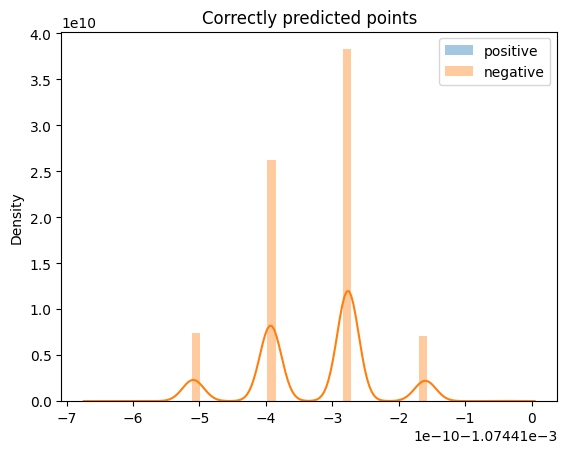

In [ ]:
#plotting the pdf of correctly predicted positive and negative points
import matplotlib.pyplot as plt
import seaborn as sns
_,correct_pred_pos,correct_pred_neg=acc_threshold(predicted_labels,0.3)
sns.distplot(correct_pred_pos,label='positive')
sns.distplot(correct_pred_neg,label='negative')
plt.title('Correctly predicted points')
plt.legend()
plt.show()


In [ ]:
#finding incorrectly predicted positive and negative points
incorrect_pos=[]
incorrect_neg=[]
for i in range(len(val_labels)):
  if val_labels[i]==1 and predicted_labels[i]<0.3:
    incorrect_pos.append(predicted_labels[i])
  elif val_labels[i]==-1 and predicted_labels[i]>=0.3:
    incorrect_neg.append(predicted_labels[i])

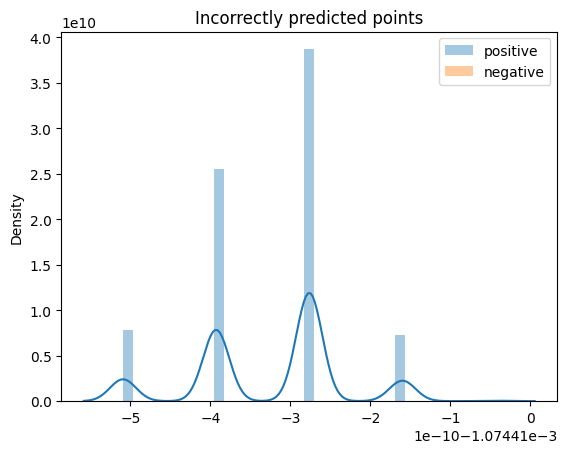

In [ ]:
#plotting the pdf of model predicted similarities for incorrectly predicted positive and negative points
sns.distplot(incorrect_pos,label='positive')
sns.distplot(incorrect_neg,label='negative')
plt.title('Incorrectly predicted points')
plt.legend()
plt.show()

**Embedding extraction using the model**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading the trained medical bert model from above checkpoint
#compiling and training the medical qa model
import tensorflow as tf
import tensorflow.keras.backend as K
import numpy as np
K.set_floatx('float32')
learning_rate=5e-6
num_epochs=5
optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
medical_qa_model=MedicalQAModelwithBert(trainable=True)
medical_qa_model.compile(
    optimizer=optimizer, loss=tf.keras.losses.mean_squared_error, metrics=[custom_metric_acc])

# medical_qa_model=MedicalsQAModelwithBert(trainable=True)
medical_qa_model.load_weights('/content/drive/My Drive/NLP/medical_bert_re1/medic1_0.49753737449645996')

In [ ]:
#defining the question extractor model
x1=tf.keras.layers.Input((512),name='question',dtype='int64')
x2=tf.keras.layers.Input((512),name='question_mask',dtype='int64')
q_embed=medical_qa_model.get_layer('q_ffn')(medical_qa_model.get_layer('tf_bert_model').bert(input_ids=x1,attention_mask=x2,).pooler_output)
question_extractor_model=tf.keras.Model(inputs=[x1,x2],outputs=q_embed)

In [ ]:
#saving the question extractor model to disk
question_extractor_model.save('question_extractor_model_2_11')

In [ ]:
#loading the question extractor model from disk
question_extractor_model=tf.keras.models.load_model('question_extractor_model_2_11')

In [ ]:
#function to extract embeddings given a question and a question mask
def question_extractor(sam_dict):
  q_embed=question_extractor_model({'question':sam_dict['question'],'question_mask':sam_dict['question_mask']})
  return q_embed


In [ ]:
#defining function to extract question embeddings given question
def extract_question_embed(question):
  max_length=512
  tokenized_questions=[]
  tokenized_question =  biobert_tokenizer.encode(question)
  tokenized_questions.append(tokenized_question)

  # padding the sequences
  tokenized_questions = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_questions, maxlen=max_length, padding='post')
  attention_mask=[[1 if token>0 else 0 for token in q] for q in tokenized_questions]
  return question_extractor({'question':np.array(tokenized_questions),'question_mask':np.array(attention_mask)})

In [ ]:
#defining the answer extractor model
x1=tf.keras.layers.Input((512),name='answer',dtype='int64')
x2=tf.keras.layers.Input((512),name='answer_mask',dtype='int64')
a_embed=medical_qa_model.get_layer('a_ffn')(medical_qa_model.get_layer('tf_bert_model').bert(input_ids=x1,attention_mask=x2,).pooler_output)
answer_extractor_model=tf.keras.Model(inputs=[x1,x2],outputs=a_embed)

In [ ]:
#saving the answer extractor model to disk
answer_extractor_model.save('answer_extractor_model_2_13')

In [ ]:
#loading the answer extractor model from disk
answer_extractor_model=tf.keras.models.load_model('answer_extractor_model_2_13')

In [ ]:
#function to extract embeddings given an answer and an answer mask
def answer_extractor(sam_dict):
  a_embed=answer_extractor_model({'answer':sam_dict['answer'],'answer_mask':sam_dict['answer_mask']})
  return a_embed


In [ ]:
#defining function to extract answer embeddings
def extract_answer_embed(answer):
  max_length=512
  tokenized_answers=[]
  tokenized_answer =  biobert_tokenizer.encode(answer)
  tokenized_answers.append(tokenized_answer)

  # padding the sequences
  tokenized_answers = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_answers, maxlen=max_length, padding='post')
  attention_mask=[[1 if token>0 else 0 for token in q] for q in tokenized_answers]
  return answer_extractor({'answer':np.array(tokenized_answers),'answer_mask':np.array(attention_mask)})

In [ ]:
#extracting the original(without negative sampling) train dataset
pos_train=train[train.label==1.0].copy()
pos_train.shape

(23749, 4)

In [ ]:
#extracting the original(without negative sampling) validation dataset
pos_validation=validation[validation.label==1.0].copy()
pos_validation.shape

(5940, 4)

In [ ]:
#extracting the question embeddings of train data
from tqdm.notebook import tqdm
tqdm.pandas()
pos_train['short_question_embed']=pos_train.short_question.progress_apply(lambda x: extract_question_embed(x))

  0%|          | 0/23749 [00:00<?, ?it/s]

In [ ]:
#extracting the question embeddings of validation data
pos_validation['short_question_embed']=pos_validation.short_question.progress_apply(lambda x: extract_question_embed(x))

  0%|          | 0/5940 [00:00<?, ?it/s]

In [ ]:
#extracting the answer embeddings of train data
pos_train['short_answer_embed']=pos_train.short_answer.progress_apply(lambda x: extract_answer_embed(x))

  0%|          | 0/23749 [00:00<?, ?it/s]

In [ ]:
#extracting the answer embeddings of validation data
pos_validation['short_answer_embed']=pos_validation.short_answer.progress_apply(lambda x: extract_answer_embed(x))

  0%|          | 0/5940 [00:00<?, ?it/s]

In [ ]:
#converting embeddings from tensors to numpy arrays
pos_train['short_answer_embed_numpy']=pos_train.short_answer_embed.apply(lambda x: x.numpy() )
pos_train['short_question_embed_numpy']=pos_train.short_question_embed.apply(lambda x: x.numpy())

In [ ]:
#converting embeddings from tensors to numpy arrays
pos_validation['short_answer_embed_numpy']=pos_validation.short_answer_embed.apply(lambda x: x.numpy() )
pos_validation['short_question_embed_numpy']=pos_validation.short_question_embed.apply(lambda x: x.numpy())

In [ ]:
#Saving train question and answer embeddings to disk
pos_train.drop(['short_answer_embed','short_question_embed'],axis=1).to_csv('re_train_embeds.csv',index=False)

In [ ]:
#saving validation question and answer embeddings to disk
pos_validation.drop(['short_answer_embed','short_question_embed'],axis=1).to_csv('re_validation_embeds.csv',index=False)

In [ ]:
# Zip all files in jupyter notebook
!zip -r /content/file.zip /content/drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!ls

In [ ]:
from google.colab import files
import zipfile
import os
files.download('file.zip')